In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [33]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [34]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [36]:
data.describe()

,기준년월,품목대분류코드,품목중분류코드,매출금액,매출건수
count,519297.000000,519297.000000,519297.000000,5.192970e+05,519297.000000
mean,201995.665719,18.282054,1839.539046,2.188457e+06,48.958860
std,74.914933,13.237654,1323.699108,6.438257e+06,163.855617
min,201903.000000,10.000000,1010.000000,1.490000e+03,4.000000
25%,201909.000000,13.000000,1312.000000,3.412650e+05,9.000000
50%,202003.000000,17.000000,1710.000000,7.628000e+05,17.000000
75%,202009.000000,20.000000,2013.000000,1.878443e+06,38.000000
max,202103.000000,99.000000,9913.000000,5.918488e+08,11811.000000


In [37]:
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data.head()

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,1010,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,2110,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,1913,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,2111,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,1710,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [38]:
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수
0,10,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13
1,21,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29
2,19,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46
3,21,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54
4,17,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58


In [39]:
def get_encoding(data, category, target):
    df = pd.DataFrame(data[category])
    for i in range(len(df)):
        if df.iloc[i, 0] == target : df.iloc[i, 0] = 1
        else: df.iloc[i, 0] = 0
    data.drop(category, axis = 1, inplace= True)
    data = data.join(df)
    return data

In [40]:
data = get_encoding(data, '품목대분류코드', 16)

In [41]:
data.head(25)

,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,품목대분류코드
0,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,0
1,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,0
2,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,0
3,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,0
4,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,0
5,남성,50대,성인자녀가구,서울특별시,강동구,874323,8,0
6,남성,40대,초중고자녀가구,서울특별시,강동구,444666,13,0
7,여성,40대,신혼영유아가구,서울특별시,강동구,1048087,17,0
8,여성,20대,1인가구,서울특별시,강동구,2429276,17,0
9,남성,40대,초중고자녀가구,서울특별시,강동구,529505,17,0


In [42]:
data['품목대분류코드'].value_counts()

0    454302
1     64995
Name: 품목대분류코드, dtype: int64

여성    61.170859
남성    38.829141
Name: 성별, dtype: float64
40대       32.368644
30대       25.934303
50대       16.828987
20대       15.345796
60대 이상     9.173013
20세 미만     0.349258
Name: 연령, dtype: float64
신혼영유아가구    31.803985
초중고자녀가구    20.896992
성인자녀가구     19.347642
1인가구       18.778368
노인가구        9.173013
Name: 가구생애주기, dtype: float64


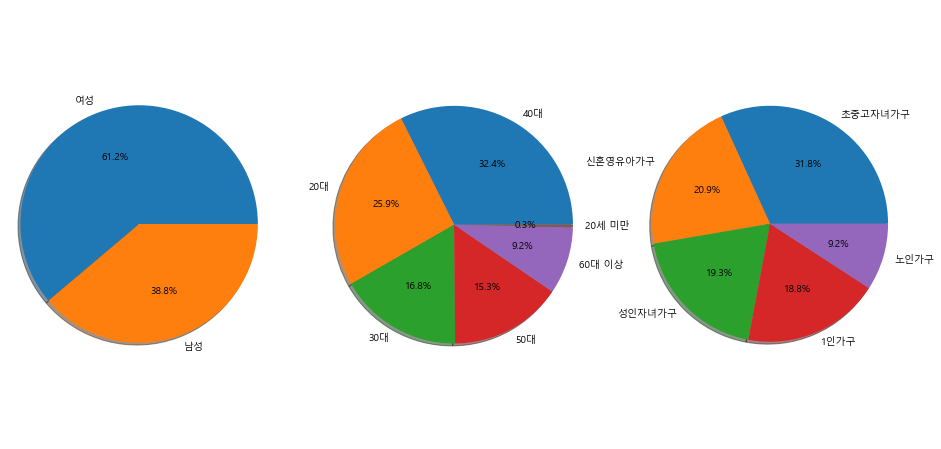

In [43]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령', '가구생애주기']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].unique()
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

In [44]:
data_f_Seoul = data_f[data_f['고객소재지_광역시도'] == '서울특별시']
df = pd.DataFrame(data_f_Seoul['고객소재지_시군구'].value_counts())
df.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df

,고객소재지_시군구,합계
0,금천구,635
1,관악구,720
2,강북구,749
3,중구,754
4,양천구,759
5,도봉구,808
6,노원구,1132
7,중랑구,1184
8,광진구,1240
9,종로구,1249


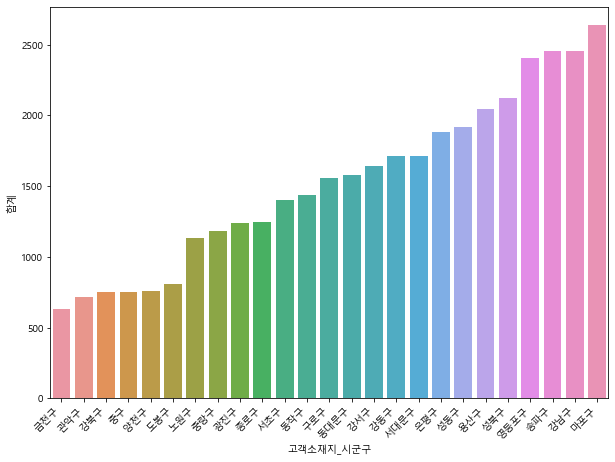

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = '고객소재지_시군구', y = '합계', data = df)
fig.autofmt_xdate(rotation = 45)

In [46]:
#인코딩 적용 함수 만들기
def get_dummies(column, df):
    dummies = pd.get_dummies(df[column])
    df.drop(column, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [47]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

In [48]:
data_dummies.head()

,매출금액,매출건수,품목대분류코드,강남구,강동구,강북구,강서구,강화군,계양구,고양시,...,양천구,연수구,영등포구,옹진군,용산구,용인시,은평구,종로구,중구,중랑구
0,782521,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,963789,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,924309,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1089360,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1656740,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0.87484
1    0.12516
Name: 품목대분류코드, dtype: float64


<AxesSubplot:xlabel='품목대분류코드', ylabel='count'>

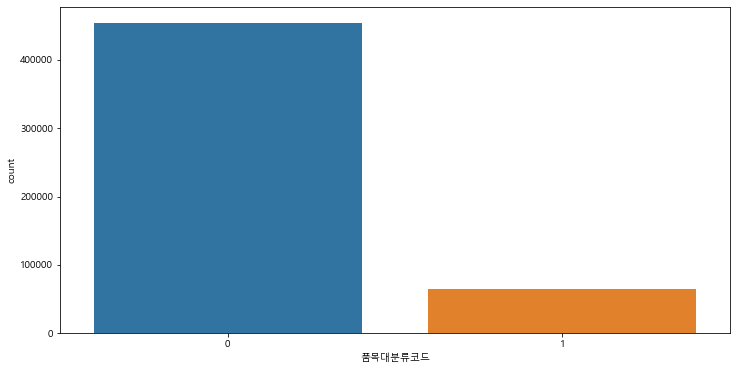

In [49]:
N = len(data_dummies)
print(data_dummies['품목대분류코드'].value_counts()/N)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.countplot(x = '품목대분류코드', data = data_dummies)

레이블 분포가 불규칙하므로 SMOTE기법 적용 필요

### 데이터 사전처리
#### 피처 데이터 가공


<AxesSubplot:xlabel='매출금액', ylabel='Density'>

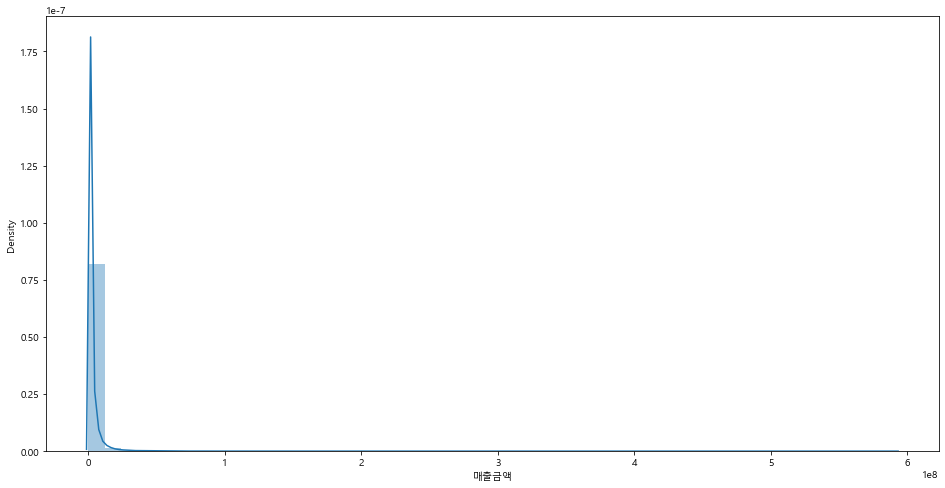

In [50]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액'])

<AxesSubplot:xlabel='매출건수', ylabel='Density'>

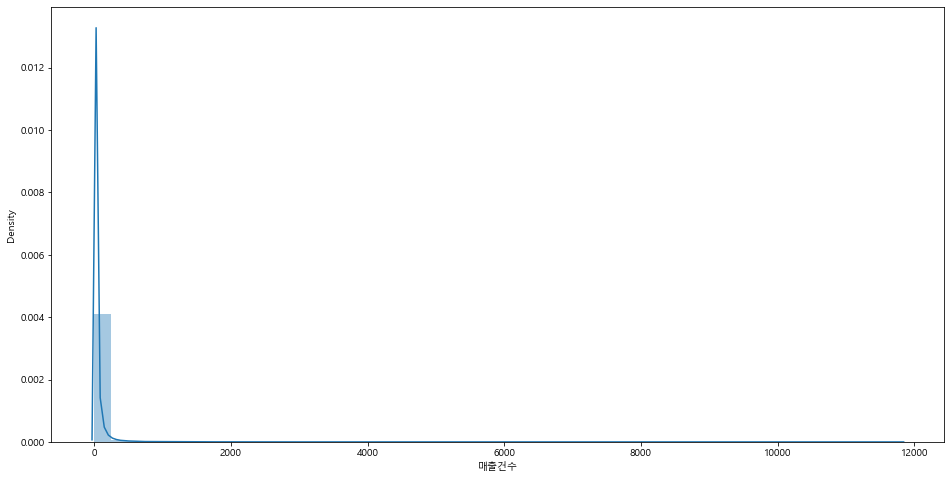

In [51]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수'])

피처들의 분포도가 불규칙 
* 로그 변환 적용
* 이상치 데이터 처리

In [52]:
def get_preprocessed_df(df, category):
    df_copy = df.copy()
    scaled = np.log1p(df_copy[category])
    df_copy.insert(0, category + '_Scaled', scaled)
    df_copy.drop(category, axis = 1, inplace = True)
    return df_copy

<AxesSubplot:xlabel='매출금액_Scaled', ylabel='Density'>

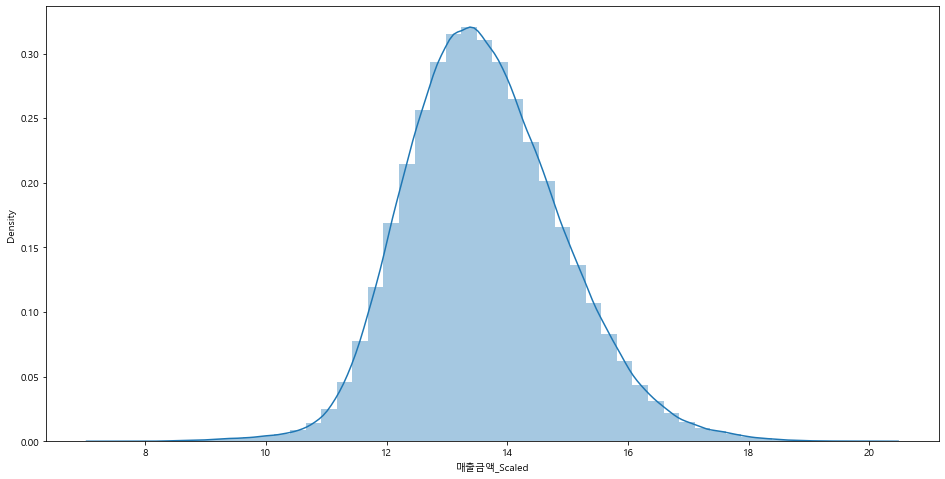

In [53]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액_Scaled'])

<AxesSubplot:xlabel='매출건수_Scaled', ylabel='Density'>

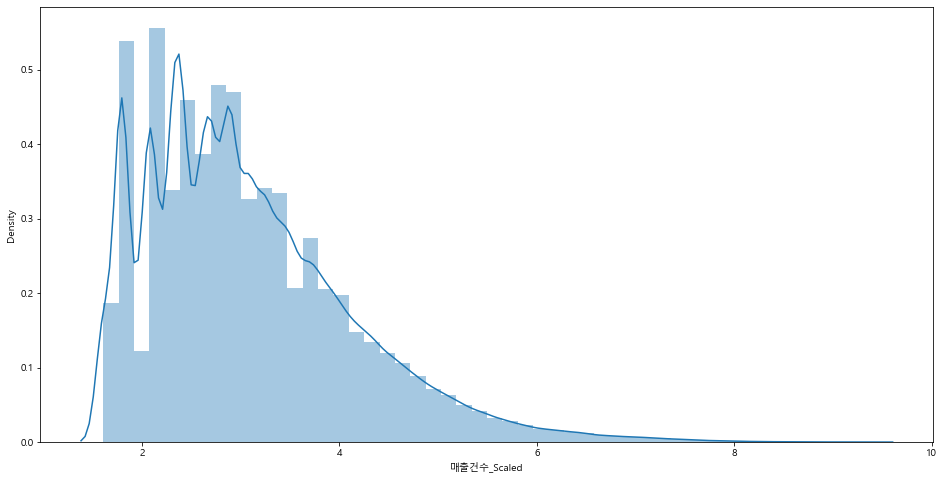

In [54]:
data_dummies = get_preprocessed_df(data_dummies, '매출건수')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수_Scaled'])

매출건수가 로그변환 후에도 정규분포의 모양이 나오지 않음
* 매출금액과 매출건수는 비슷한 모양을 보일것임
* 매출금액과 매출건수의 상관계수 구해보기

In [55]:
df_M_and_C = data_dummies[['매출금액_Scaled','매출건수_Scaled']]
df_M_and_C.head()

,매출금액_Scaled,매출건수_Scaled
0,13.570277,2.639057
1,13.778629,3.401197
2,13.736803,3.850148
3,13.901102,4.007333
4,14.320363,4.077537


<AxesSubplot:>

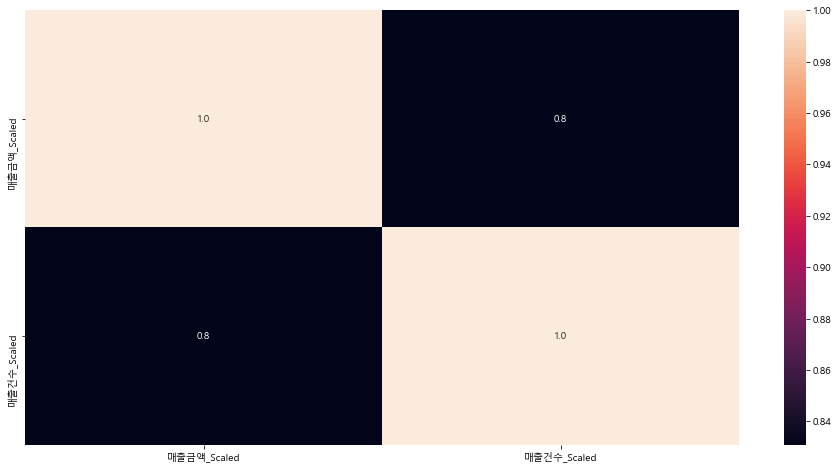

In [56]:
fig, ax = plt.subplots(1, 1, figsize= (16, 8))
sns.heatmap(df_M_and_C.corr(), annot=True, fmt = '.1f', ax = ax)

상관계수 0.8 -> 둘 중 하나 drop
* 무엇을 드랍하면 좋을지 확인해보기

In [57]:
target = data_dummies['품목대분류코드']
feature = df_M_and_C

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = pd.DataFrame(scaler.transform(feature), columns= feature.columns)

(array([0, 1]), [Text(0, 0, '매출금액_Scaled'), Text(1, 0, '매출건수_Scaled')])

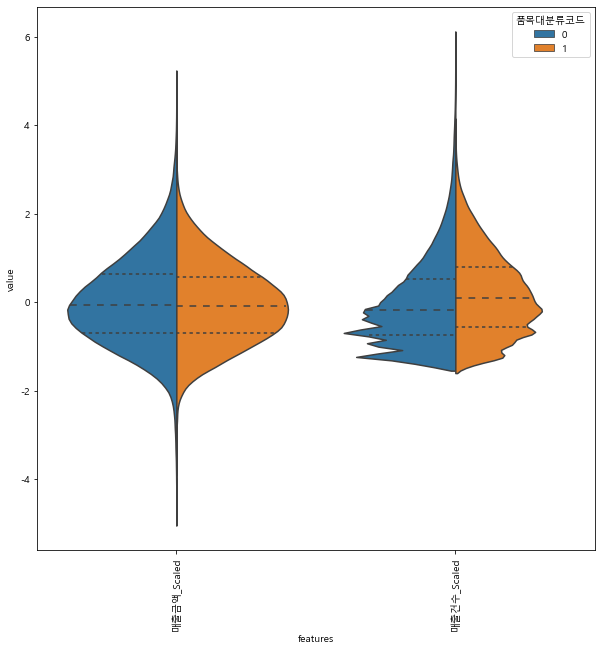

In [58]:
data = pd.concat([target, feature_scaled], axis = 1)
data = pd.melt(data, id_vars= '품목대분류코드', var_name= 'features', value_name= 'value')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = '품목대분류코드', data = data, split = True, inner = 'quart')
plt.xticks(rotation= 90)

* 매출금액은 깔끔한 정규분포의 모양을 보이는데 반해, 타겟 변수 0, 1의 분포의 차이가 별로 없음 
* 매출건수는 깔끔한 정규분포의 모양을 보이지 않는데 반해, 타겟 변수 0, 1의 분포의 차이가 조금 있음
#### 모델링을 먼저 만들어 모델을 평가하면서 사후처리로 진행

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[80265 10596]
 [10482  2517]]
정확도 : 0.7971, 정밀도 : 0.1919, 재현율 : 0.1936, F1 : 0.1928, AUC : 0.5385
오차 행렬
[[82585  8276]
 [10952  2047]]
정확도 : 0.8149, 정밀도 : 0.1983, 재현율 : 0.1575, F1 : 0.1755, AUC : 0.6373
오차 행렬
[[90769    92]
 [12999     0]]
정확도 : 0.8740, 정밀도 : 0.0000, 재현율 : 0.0000, F1 : 0.0000, AUC : 0.6668


In [61]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

get_model_train_eval(lr_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[55026 35835]
 [ 4287  8712]]
정확도 : 0.6137, 정밀도 : 0.1956, 재현율 : 0.6702, F1 : 0.3028, AUC : 0.6682


In [63]:
#DecisionTree 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_features, y_target, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

교차 검증 0 정확도: 0.7781
교차 검증 1 정확도: 0.8000
교차 검증 2 정확도: 0.7952
교차 검증 3 정확도: 0.7885
교차 검증 4 정확도: 0.8026
평균 정확도: 0.7929


In [64]:
# #RandomForest 교차검증
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(rf_clf, X_features, y_target, cv = 5)
# for iter_count, accuracy in enumerate(scores):
#     print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

# print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

In [65]:
#LogisiticRegression 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_features, y_target, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

교차 검증 0 정확도: 0.8741
교차 검증 1 정확도: 0.8743
교차 검증 2 정확도: 0.8745
교차 검증 3 정확도: 0.8728
교차 검증 4 정확도: 0.8742
평균 정확도: 0.8740


In [66]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.8748


In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [68]:
ftr_importances = pd.Series(dt_clf.feature_importances_, index = X_features.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

Feature importance:\매출금액_Scaled    0.681
매출건수_Scaled    0.128
수원시            0.010
용인시            0.010
고양시            0.010
성남시            0.008
은평구            0.007
강남구            0.007
서구             0.006
송파구            0.006
강동구            0.006
동대문구           0.006
구로구            0.006
성북구            0.006
강서구            0.006
서대문구           0.006
중랑구            0.005
부평구            0.005
남동구            0.005
마포구            0.005
dtype: float64


<AxesSubplot:>

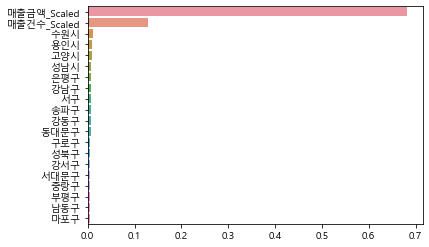

In [69]:
#feature importance 추출
print("Feature importance:\{0}".format(np.round(ftr_top20, 3)))

#feature importance를 column 별로 시각화하기
fig, ax = plt.subplots()
sns.barplot(x = ftr_top20, y = ftr_top20.index) 

## PCA로 차원을 축소 후 모델링 하기

In [70]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
pca = PCA(n_components= 8)
pca.fit(X_features)
data_pca = pca.transform(X_features)
print(data_pca.shape)

(519297, 8)


In [71]:
pca_columns = []
for i in range(1, 9):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = y_target
df_pca.head()

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,pca_component_8,target
0,-0.319488,0.304958,-0.029732,-0.016122,0.010924,-0.125137,-0.014997,-0.068565,0
1,0.314641,-0.165984,-0.035143,-0.016561,0.012282,-0.119980,-0.017638,-0.062485,0
2,0.558695,-0.544878,-0.039589,-0.017290,0.013378,-0.117415,-0.019609,-0.056362,0
3,0.784951,-0.567186,-0.039777,-0.017034,0.013440,-0.116003,-0.019848,-0.056981,0
4,1.158174,-0.363855,-0.037217,-0.015931,0.012846,-0.114378,-0.019084,-0.062599,0


In [94]:
from imblearn.over_sampling import SMOTE

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.73375	validation_1-auc:0.72827
[1]	validation_0-auc:0.74023	validation_1-auc:0.73412
[2]	validation_0-auc:0.74252	validation_1-auc:0.73665
[3]	validation_0-auc:0.74690	validation_1-auc:0.73982
[4]	validation_0-auc:0.74879	validation_1-auc:0.74126
[5]	validation_0-auc:0.75052	validation_1-auc:0.74210
[6]	validation_0-auc:0.75240	validation_1-auc:0.74307
[7]	validation_0-auc:0.75290	validation_1-auc:0.74338
[8]	validation_0-auc:0.75599	validation_1-auc:0.74392
[9]	validation_0-auc:0.75695	validation_1-auc:0.74475
[10]	validation_0-auc:0.75997	validation_1-auc:0.74508
[11]	validation_0-auc:0.76093	validation_1-auc:0.74539
[12]	validation_0-auc:0.76223	validation_1-auc:0.74604
[13]	validation_0-auc:0.76455	validation_1-auc:0.74670
[14]	validation_0-auc:0.76555	validation_1-auc:0.74659
[15]	validation_0-auc:0.76751	validation_1-auc:0.74687
[16]	validation_0-auc:0.76837	validation_1-auc:0.74720
[17]	validation_0-auc:0.77316	validation_1-auc:0.74799
[18]	validation_0-au

## 이상치 데이터 처리 후 모델링 평가

In [95]:
def get_outlier_0(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


def get_outlier_1(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index    

In [118]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

outlier_index = get_outlier_1(df = data, column='매출금액', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier_1(df = data, column='매출건수', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)

(509785, 41)


In [119]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

print(y_target.shape)
print(X_features.shape)

n = 8
pca = PCA(n_components= n)
data_pca = pca.fit_transform(X_features)
print(data_pca.shape)

pca_columns = []
for i in range(1, n + 1):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = np.array(y_target)

(509785,)
(509785, 40)
(509785, 8)


In [117]:
from imblearn.over_sampling import SMOTE

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.74209	validation_1-auc:0.73806
[1]	validation_0-auc:0.75154	validation_1-auc:0.74646
[2]	validation_0-auc:0.75413	validation_1-auc:0.74864
[3]	validation_0-auc:0.75495	validation_1-auc:0.74916
[4]	validation_0-auc:0.75723	validation_1-auc:0.75121
[5]	validation_0-auc:0.75812	validation_1-auc:0.75220
[6]	validation_0-auc:0.76047	validation_1-auc:0.75318
[7]	validation_0-auc:0.76702	validation_1-auc:0.75347
[8]	validation_0-auc:0.76715	validation_1-auc:0.75361
[9]	validation_0-auc:0.77244	validation_1-auc:0.75362
[10]	validation_0-auc:0.77315	validation_1-auc:0.75427
[11]	validation_0-auc:0.77400	validation_1-auc:0.75438
[12]	validation_0-auc:0.77643	validation_1-auc:0.75378
[13]	validation_0-auc:0.77732	validation_1-auc:0.75422
[14]	validation_0-auc:0.77808	validation_1-auc:0.75407
[15]	validation_0-auc:0.78151	validation_1-auc:0.75374
[16]	validation_0-auc:0.78200	validation_1-auc:0.75383
[17]	validation_0-auc:0.78416	validation_1-auc:0.75512
[18]	validation_0-au

data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)


In [120]:
def get_outlier(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [121]:
outlier_index = get_outlier(df = data_dummies, column='매출금액_Scaled', weight= 1.5, target = '품목대분류코드')
data_dummies.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier(df = data_dummies, column='매출건수_Scaled', weight= 1.5, target = '품목대분류코드')
data_dummies.drop(outlier_index, axis = 0, inplace=True)
print(data_dummies.shape)

(509688, 41)


In [122]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

print(y_target.shape)
print(X_features.shape)

n = 8
pca = PCA(n_components= n)
data_pca = pca.fit_transform(X_features)
print(data_pca.shape)

pca_columns = []
for i in range(1, n + 1):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = np.array(y_target)

(509688,)
(509688, 40)
(509688, 8)


In [123]:
X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.74076	validation_1-auc:0.73564
[1]	validation_0-auc:0.75213	validation_1-auc:0.74486
[2]	validation_0-auc:0.75536	validation_1-auc:0.74656
[3]	validation_0-auc:0.75743	validation_1-auc:0.74855
[4]	validation_0-auc:0.76048	validation_1-auc:0.75006
[5]	validation_0-auc:0.76199	validation_1-auc:0.75091
[6]	validation_0-auc:0.76579	validation_1-auc:0.75296
[7]	validation_0-auc:0.76640	validation_1-auc:0.75318
[8]	validation_0-auc:0.76842	validation_1-auc:0.75378
[9]	validation_0-auc:0.77069	validation_1-auc:0.75380
[10]	validation_0-auc:0.77304	validation_1-auc:0.75406
[11]	validation_0-auc:0.77651	validation_1-auc:0.75392
[12]	validation_0-auc:0.77708	validation_1-auc:0.75426
[13]	validation_0-auc:0.77803	validation_1-auc:0.75451
[14]	validation_0-auc:0.78022	validation_1-auc:0.75463
[15]	validation_0-auc:0.78415	validation_1-auc:0.75430
[16]	validation_0-auc:0.78451	validation_1-auc:0.75466
[17]	validation_0-auc:0.78621	validation_1-auc:0.75465
[18]	validation_0-au

In [128]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

clf_list = [dt_clf, rf_clf, lr_clf]

for clf in clf_list:
    clf.fit(X_train_over, y_train_over)
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)[:, 1]
    get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[72317 18544]
 [ 7135  3942]]
정확도 : 0.7481, 정밀도 : 0.1753, 재현율 : 0.3559, F1 : 0.2349, AUC : 0.5760


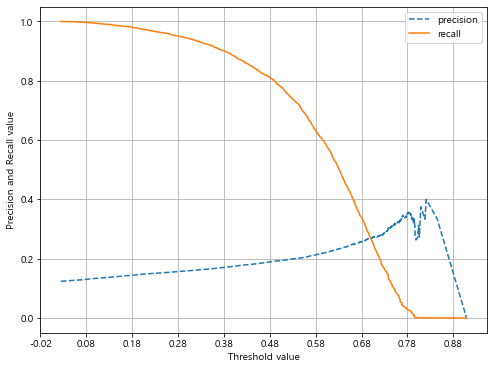

In [127]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label = 'recall')

    #threshold 값 X축의 Scale을 0.1 단위로 변경 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel("Threshold value"); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, xgb_clf.predict_proba(X_test)[:, 1])

In [ ]:
precision_recall_curve_plot(y_test, dt_clf.predict_proba(X_test)[:, 1])

In [ ]:
precision_recall_curve_plot(y_test, rf_clf.predict_proba(X_test)[:, 1])

In [ ]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {
    'max_depth' : [7, 9, 11],
    'min_child_weight' : [3, 5, 7],
    'learning_rate' : [0.02, 0.05],
    'reg_alpha' : [0, 0.03]

}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [90]:
xgb_clf = XGBClassifier(n_estimators = 800, learning_rate = 0.02, max_depth = 7, min_child_weight = 3, colsample_bytree = 0.5)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.64228	validation_1-auc:0.60550
[1]	validation_0-auc:0.74994	validation_1-auc:0.71654
[2]	validation_0-auc:0.75257	validation_1-auc:0.71874
[3]	validation_0-auc:0.75443	validation_1-auc:0.72078
[4]	validation_0-auc:0.75537	validation_1-auc:0.72200
[5]	validation_0-auc:0.75265	validation_1-auc:0.71661
[6]	validation_0-auc:0.75309	validation_1-auc:0.71715
[7]	validation_0-auc:0.75241	validation_1-auc:0.71650
[8]	validation_0-auc:0.75336	validation_1-auc:0.71768
[9]	validation_0-auc:0.75932	validation_1-auc:0.72608
[10]	validation_0-auc:0.75875	validation_1-auc:0.72544
[11]	validation_0-auc:0.75674	validation_1-auc:0.72194
[12]	validation_0-auc:0.75630	validation_1-auc:0.72162
[13]	validation_0-auc:0.75786	validation_1-auc:0.71919
[14]	validation_0-auc:0.75865	validation_1-auc:0.71774
[15]	validation_0-auc:0.75904	validation_1-auc:0.71833
[16]	validation_0-auc:0.75714	validation_1-auc:0.71513
[17]	validation_0-auc:0.75718	validation_1-auc:0.71527
[18]	validation_0-au

## XGB 하이퍼 파라미터 튜닝